**Import Libraries**

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


**Load and Prepare Data**

In [7]:
# Load original datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Aggregate transaction data
transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum'     # Total quantity purchased
}).reset_index()

# Merge customer and transaction data
customer_data = customers.merge(transactions, on='CustomerID', how='left')

# Fill missing values for customers without transactions
customer_data.fillna({'TotalValue': 0, 'Quantity': 0}, inplace=True)

# Add clustering results from the original assignment
clusters = pd.read_csv('Customer_Clusters.csv')
customer_data = customer_data.merge(clusters, on='CustomerID', how='left')


**Perform Clustering**

In [8]:
# Select numeric features and cluster labels
features = customer_data[['TotalValue', 'Quantity']]
cluster_labels = customer_data['Cluster']

# Standardise the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")

# Compute Silhouette Score
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Davies-Bouldin Index: 0.734
Silhouette Score: 0.447


**Evaluate Clustering**

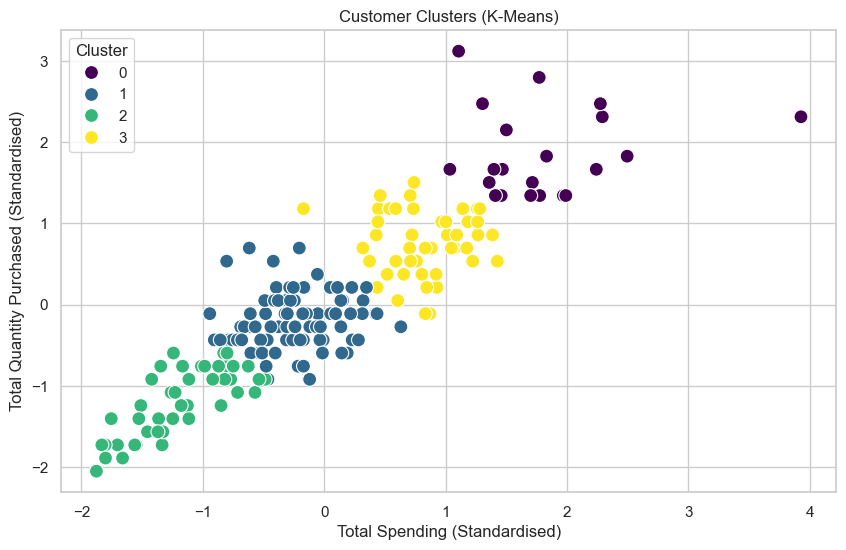

In [9]:
# Visualise the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_scaled[:, 0], 
    y=features_scaled[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=100
)
plt.title('Customer Clusters (K-Means)')
plt.xlabel('Total Spending (Standardised)')
plt.ylabel('Total Quantity Purchased (Standardised)')
plt.legend(title='Cluster')
plt.show()


**Save Results**

In [10]:
# Save the enriched dataset with clustering metrics
customer_data.to_csv('Customer_Clusters_Enriched.csv', index=False)
print("Enriched dataset saved to 'Customer_Clusters_Enriched.csv'")


Enriched dataset saved to 'Customer_Clusters_Enriched.csv'
